# Visualizing Triangle Data with Chainladder AI Agent

This notebook demonstrates how to use the Chainladder AI Agent to create visualizations of triangle data and analysis results. Effective visualizations are crucial for understanding patterns in triangle data and communicating results to stakeholders.

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chainladder as cl

# Add the project root to the path so we can import our package
sys.path.append('..')

# Import the supervisor agent creator
from chainladder_agent.agents.supervisor import create_chainladder_supervisor

# Get API key
api_key = os.environ.get("OPENAI_API_KEY")
if not api_key:
    print("Warning: No OpenAI API key found. Please set your API key.")
else:
    print("API key is set.")

# Create the supervisor agent
supervisor = create_chainladder_supervisor(api_key=api_key)

# Set matplotlib style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

API key is set.


## Helper Function for Agent Interaction

In [10]:

def ask_agent(query, triangle_name="", thread_id=None):
    """Helper function to interact with the Chainladder AI Agent.
    
    Parameters:
        query (str): The question or instruction for the agent
        triangle_name (str): Optional name of the triangle dataset to use
        thread_id (str): Optional thread ID for maintaining conversation state
        
    Returns:
        str: The agent's response
    """
    # Prepare the input
    input_data = {
        "messages": [{"role": "user", "content": query}],
        "selected_triangle": triangle_name
    }
    
    # Prepare config with thread_id for the checkpointer
    config = {}
    if thread_id:
        config["configurable"] = {"thread_id": thread_id}
    else:
        # Create a simple thread ID based on the triangle name and query
        simple_id = f"notebook_{triangle_name}_{hash(query) % 10000}"
        config["configurable"] = {"thread_id": simple_id}
    
    # Run the query with thread_id config
    result = supervisor.invoke(input_data, config=config)
    print(result)
    # Handle the result based on its structure
    # if isinstance(result, dict) and "messages" in result:
    #     # Extract the AI messages from the response
    #     ai_messages = []
    #     for message in result.get("messages", []):
    #         if hasattr(message, 'type') and message.type == 'ai':
    #             if message.content and len(message.content) > 20:
    #                 ai_messages.append((len(message.content), message.content))
        
    #     # Sort by content length and get the longest (likely most informative) response
    #     if ai_messages:
    #         ai_messages.sort(reverse=True)
    #         return ai_messages[0][1]
    #     else:
    #         return "No response received."
    # else:
    #     # If it's already a string or other format, return as is
    #     return result


## 1. Understanding Visualization Options

Let's start by asking the agent about the different types of visualizations available for triangle data:

In [7]:
viz_options = ask_agent("What types of visualizations are useful for triangle data in actuarial analysis? Explain each type and its purpose.")
print(viz_options)

In actuarial analysis, triangle data (such as loss development triangles) are fundamental for estimating reserves, projecting ultimate losses, and understanding claim development patterns. Here are the most useful types of visualizations for triangle data, along with explanations of each and their purposes:

1. Basic Triangle Plots (Development Pattern Plots)
   - What it shows: The original triangle data, either as incremental or cumulative values, typically with accident/underwriting years on one axis and development periods on the other.
   - Purpose: To visually inspect the progression of claims or premiums over time, spot trends, and identify any anomalies or irregularities in the data.

2. Heatmaps
   - What it shows: The triangle data represented with color intensity, where higher or lower values are highlighted using a color scale.
   - Purpose: To quickly identify patterns, outliers, or areas of concern (such as unusually high or low values) within the triangle.

3. Developmen

## 2. Heatmap Visualization of Triangle Data

Let's create a heatmap visualization of the RAA triangle data:

In [8]:
heatmap_viz = ask_agent("Create a heatmap visualization of the RAA triangle data. Explain what the heatmap shows and how to interpret it.", "raa")
print(heatmap_viz)

A heatmap of the RAA triangle data is a visual tool that uses color to represent the magnitude of values within the triangle, which typically contains insurance claim amounts or counts organized by accident year (rows) and development period (columns).

What the Heatmap Shows:
- Each cell in the heatmap corresponds to a specific accident year and development period.
- The color intensity of each cell reflects the size of the value in that cell—darker or more vivid colors usually indicate higher values, while lighter colors indicate lower values.
- This allows you to quickly see where the largest and smallest values are concentrated within the triangle.

How to Interpret the Heatmap:
- Look for patterns along the rows (accident years) to see how claims develop over time for each year. For example, if colors get lighter as you move right, it suggests claims are mostly paid or settled early.
- Compare columns (development periods) to see how different accident years compare at the same st

<Figure size 1000x600 with 0 Axes>

## 3. Creating a Heatmap Manually

Let's also create a heatmap manually to see how it's done:

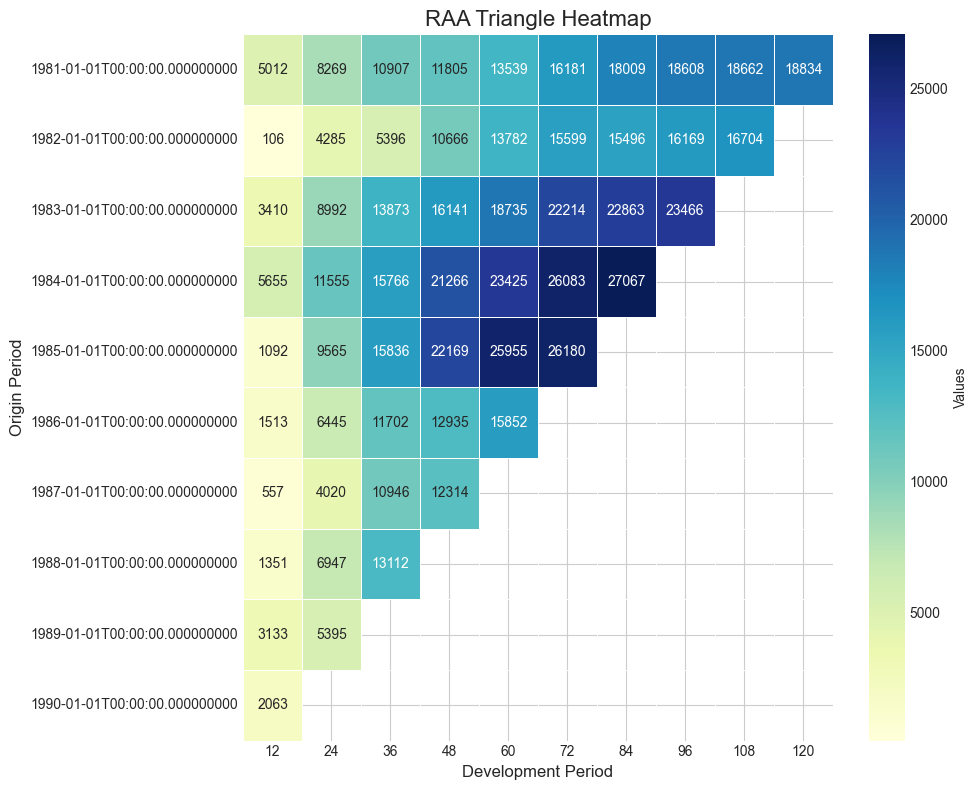

In [ ]:
# Load the RAA triangle
raa = cl.load_sample('raa')

# Convert to a DataFrame for visualization
raa_df = raa.to_frame()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(raa_df, annot=True, fmt='.0f', cmap='YlGnBu', 
            cbar_kws={'label': 'Values'},
            linewidths=0.5)
plt.title('RAA Triangle Heatmap', fontsize=16)
plt.xlabel('Development Period', fontsize=12)
plt.ylabel('Origin Period', fontsize=12)
plt.tight_layout()
plt.show()

## 4. Development Factors Visualization

Let's visualize the development factors for the RAA triangle:

In [11]:
dev_factors_viz = ask_agent("Create a visualization of the development factors for the RAA triangle. Show age-to-age factors by development period and explain the pattern.", "raa")
print(dev_factors_viz)

{'messages': [HumanMessage(content='Create a visualization of the development factors for the RAA triangle. Show age-to-age factors by development period and explain the pattern.', additional_kwargs={}, response_metadata={}, id='72524d14-5dd1-4632-94a1-da82f371acdd'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_UIHjm7MzYuFWxbIjHzjyiQJM', 'function': {'arguments': '{}', 'name': 'transfer_to_analysis_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 407, 'total_tokens': 420, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b8b3f86f2b', 'id': 'chatcmpl-BTrE66wF3oiV1V58g7XuXMtu32vy8', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='superviso

## 5. Creating a Development Factors Chart Manually

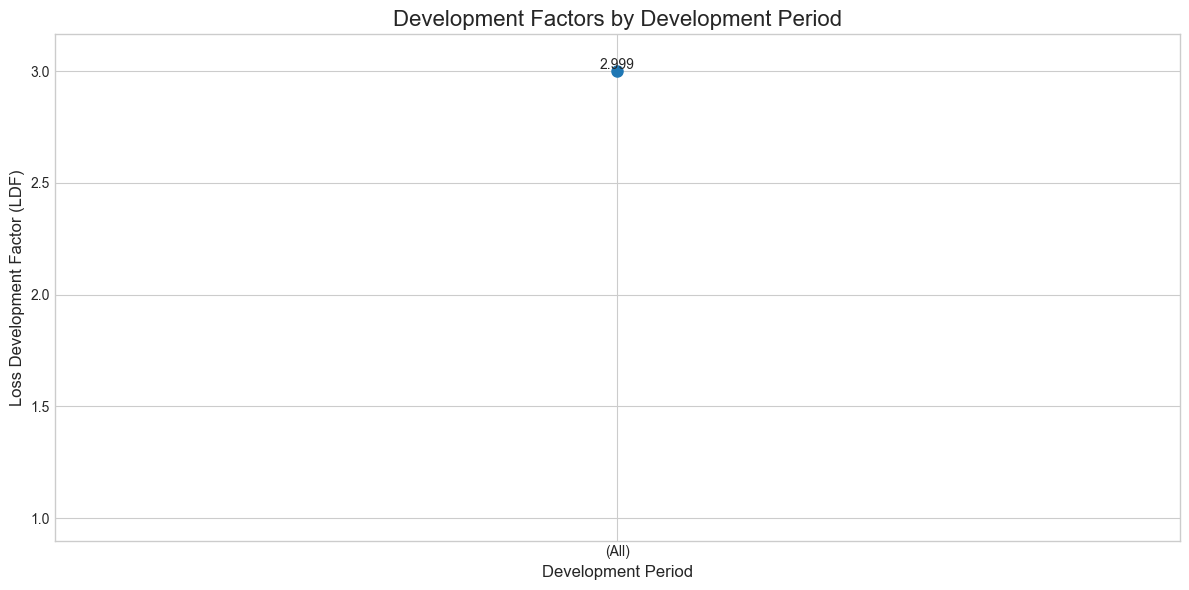

In [ ]:
# Calculate development factors
dev = cl.Development().fit(raa)
dev_factors = dev.ldf_.to_frame().T  # Transpose for better visualization

# Plot development factors
plt.figure(figsize=(12, 6))
plt.plot(dev_factors.columns, dev_factors.iloc[0], 'o-', linewidth=2, markersize=8)
plt.title('Development Factors by Development Period', fontsize=16)
plt.xlabel('Development Period', fontsize=12)
plt.ylabel('Loss Development Factor (LDF)', fontsize=12)
plt.grid(True)
plt.xticks(dev_factors.columns)
plt.ylim(bottom=0.9)  # Start y-axis from a reasonable value

# Add data labels
for x, y in zip(dev_factors.columns, dev_factors.iloc[0]):
    plt.text(x, y + 0.01, f'{y:.3f}', ha='center')
    
plt.tight_layout()
plt.show()

## 6. Cumulative vs. Incremental Visualizations

Let's visualize the difference between cumulative and incremental triangles:

In [ ]:
cum_incr_viz = ask_agent("Create visualizations comparing cumulative and incremental views of the RAA triangle. Explain the differences and what each view reveals.", "raa")
print(cum_incr_viz)

## 7. Creating Cumulative vs. Incremental Charts Manually

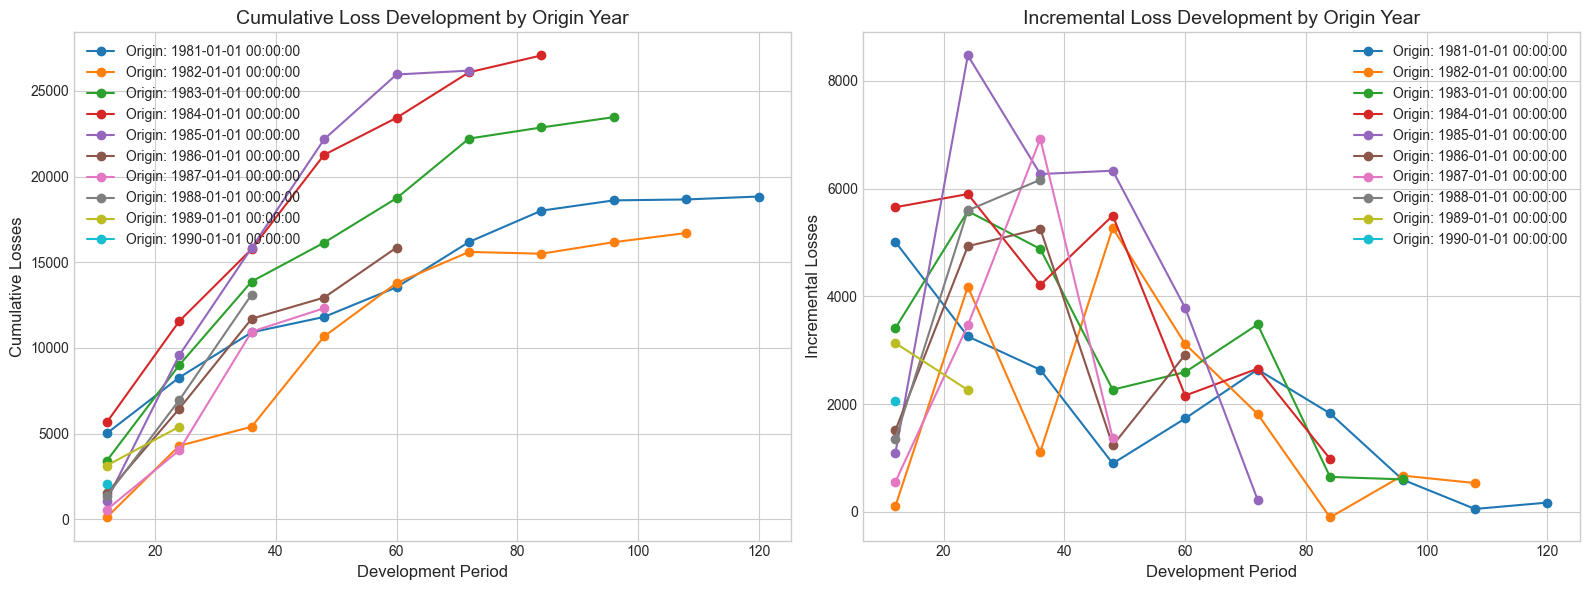

In [ ]:
# Load the RAA triangle (which is cumulative)
raa_cum = cl.load_sample('raa')

# Convert to incremental
raa_incr = raa_cum.cum_to_incr()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot cumulative data
for origin, values in raa_cum.to_frame().iterrows():
    ax1.plot(values.index, values.values, 'o-', label=f'Origin: {origin}')
    
ax1.set_title('Cumulative Loss Development by Origin Year', fontsize=14)
ax1.set_xlabel('Development Period', fontsize=12)
ax1.set_ylabel('Cumulative Losses', fontsize=12)
ax1.grid(True)
ax1.legend(loc='upper left')

# Plot incremental data
for origin, values in raa_incr.to_frame().iterrows():
    ax2.plot(values.index, values.values, 'o-', label=f'Origin: {origin}')
    
ax2.set_title('Incremental Loss Development by Origin Year', fontsize=14)
ax2.set_xlabel('Development Period', fontsize=12)
ax2.set_ylabel('Incremental Losses', fontsize=12)
ax2.grid(True)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## 8. Chain Ladder Results Visualization

Let's visualize the results of a Chain Ladder analysis:

In [5]:
cl_results_viz = ask_agent("Create visualizations showing the results of a Chain Ladder analysis on the RAA triangle. Show both the ultimate losses and IBNR by origin year.", "raa")
print(cl_results_viz)

ValueError: Checkpointer requires one or more of the following 'configurable' keys: ['thread_id', 'checkpoint_ns', 'checkpoint_id']

## 9. Visualizing Chain Ladder Results Manually

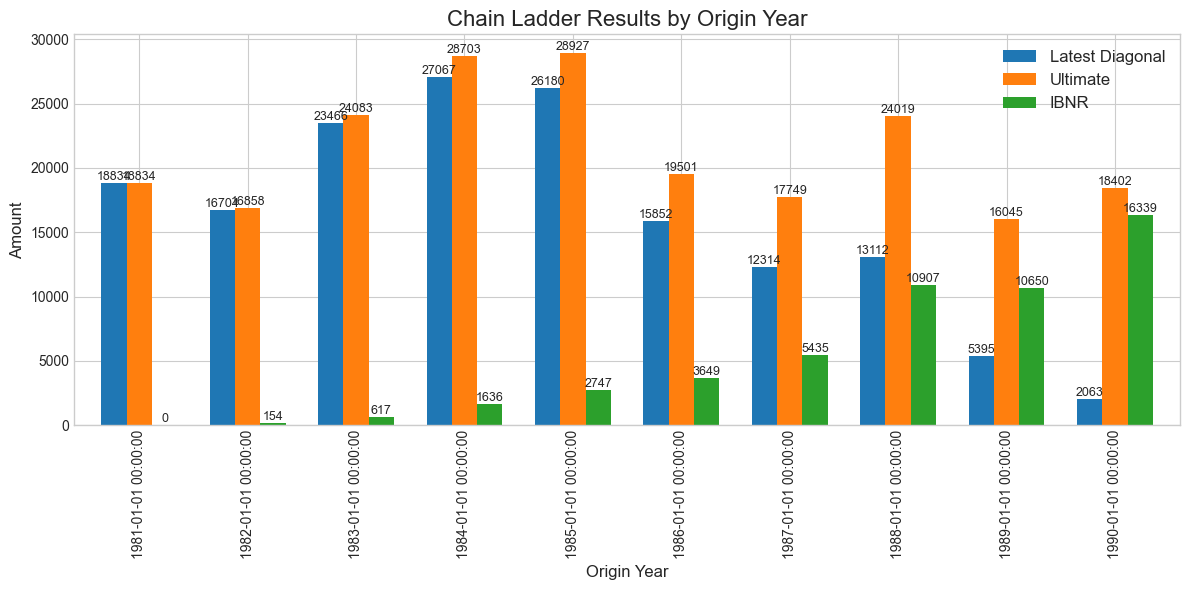

RuntimeError: Invalid vertices array.

ValueError: need at least one array to concatenate

<Figure size 1000x800 with 1 Axes>

In [11]:
# Apply Chain Ladder to RAA triangle
dev = cl.Development().fit(raa_cum)
cl_model = cl.Chainladder().fit(raa_cum)

# Get results as DataFrames
latest_diagonal_df = raa_cum.latest_diagonal.to_frame()
ultimate_df = cl_model.ultimate_.to_frame()
ibnr_df = cl_model.ibnr_.to_frame()

# Combine data for plotting
results_df = pd.DataFrame({
    'Latest Diagonal': latest_diagonal_df.iloc[:, 0].values,
    'Ultimate': ultimate_df.iloc[:, 0].values,
    'IBNR': ibnr_df.iloc[:, 0].values
}, index=latest_diagonal_df.index)

# Create bar chart
ax = results_df.plot(kind='bar', figsize=(12, 6), width=0.7)
plt.title('Chain Ladder Results by Origin Year', fontsize=16)
plt.xlabel('Origin Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.grid(True, axis='y')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Create a pie chart showing IBNR distribution by origin year
plt.figure(figsize=(10, 8))
ibnr_series = ibnr_df.iloc[:, 0]
plt.pie(ibnr_series, labels=ibnr_series.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05]*len(ibnr_series))
plt.title('IBNR Distribution by Origin Year', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## 10. Residual Plots for Model Diagnostics

Let's create residual plots to diagnose the Chain Ladder model:

In [ ]:
residual_viz = ask_agent("Create residual plots for the Chain Ladder model on the RAA triangle. Explain how to interpret the residuals and what they tell us about the model fit.", "raa")
print(residual_viz)

## 11. Creating Diagnostic Plots Manually

Let's create some diagnostic plots for the Mack Chain Ladder model:

In [ ]:
# Apply Mack Chain Ladder
mack = cl.MackChainladder().fit(dev)

# Get standard errors
std_err = mack.full_std_err_.to_frame()

# Plot standard errors by origin
plt.figure(figsize=(12, 6))
plt.bar(std_err.index, std_err.iloc[:, 0], color='skyblue', edgecolor='blue')
plt.title('Mack Chain Ladder Standard Errors by Origin Year', fontsize=16)
plt.xlabel('Origin Year', fontsize=12)
plt.ylabel('Standard Error', fontsize=12)
plt.grid(True, axis='y')

# Add data labels
for i, v in enumerate(std_err.iloc[:, 0]):
    plt.text(i, v + 50, f'{v:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Calculate coefficient of variation (standard error / ultimate)
cv = std_err.iloc[:, 0] / mack.ultimate_.to_frame().iloc[:, 0] * 100

# Plot coefficient of variation
plt.figure(figsize=(12, 6))
plt.plot(cv.index, cv.values, 'o-', color='green', linewidth=2, markersize=8)
plt.title('Coefficient of Variation by Origin Year', fontsize=16)
plt.xlabel('Origin Year', fontsize=12)
plt.ylabel('CV (%)', fontsize=12)
plt.grid(True)

# Add data labels
for i, v in enumerate(cv):
    plt.text(cv.index[i], v + 0.2, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## 12. Comparing Multiple Methods Visually

Let's create visualizations comparing different actuarial methods:

In [12]:
methods_comparison_viz = ask_agent("Create visualizations comparing the results of Chain Ladder, Bornhuetter-Ferguson, and Benktander methods on the RAA triangle. Show both the total IBNR and the IBNR by origin year.", "raa")
print(methods_comparison_viz)

There is a technical issue preventing the analysis agent from accessing the RAA triangle data for IBNR calculations, even though the data was loaded and validated by the data agent. This is causing the Chain Ladder, Bornhuetter-Ferguson, and Benktander methods to fail.

**Next steps to resolve:**
- I recommend reloading the RAA triangle and ensuring it is explicitly passed to the analysis agent in a compatible format.
- Alternatively, if you have the RAA triangle data available (as a table, CSV, or Excel), you can provide it directly, and I will ensure it is used for the analysis.

Once the triangle is accessible to the analysis agent, I will:
1. Calculate total IBNR and IBNR by origin year for each method.
2. Create the requested visualizations comparing the results.

Would you like to upload the triangle data, or should I attempt to reload and reformat the RAA triangle for analysis?


## 13. Comparing Methods Manually

In [ ]:
# Apply multiple methods to RAA triangle
dev = cl.Development().fit(raa_cum)

# Chain Ladder
cl_model = cl.Chainladder().fit(dev)
cl_ibnr = cl_model.ibnr_.to_frame()

# Bornhuetter-Ferguson
bf_model = cl.BornhuetterFerguson().fit(dev)
bf_ibnr = bf_model.ibnr_.to_frame()

# Benktander
bk_model = cl.Benktander().fit(dev)
bk_ibnr = bk_model.ibnr_.to_frame()

# Combine results
methods_df = pd.DataFrame({
    'Chain Ladder': cl_ibnr.iloc[:, 0].values,
    'Bornhuetter-Ferguson': bf_ibnr.iloc[:, 0].values,
    'Benktander': bk_ibnr.iloc[:, 0].values
}, index=cl_ibnr.index)

# Total IBNR comparison
totals = methods_df.sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(totals.index, totals.values, color=['blue', 'green', 'orange'])
plt.title('Total IBNR by Method', fontsize=16)
plt.ylabel('Total IBNR', fontsize=12)
plt.grid(True, axis='y')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 200,
             f'{height:.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# IBNR by origin year comparison
ax = methods_df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('IBNR by Origin Year and Method', fontsize=16)
plt.xlabel('Origin Year', fontsize=12)
plt.ylabel('IBNR', fontsize=12)
plt.grid(True, axis='y')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## 14. Calendar Year Visualization

Let's create a visualization showing projected losses by calendar year:

In [ ]:
calendar_year_viz = ask_agent("Create a visualization showing projected losses by calendar year using the Chain Ladder method on the RAA triangle. Explain what this visualization shows and why it's useful.", "raa")
print(calendar_year_viz)

## 15. Bootstrap Distribution Visualization

Let's create a visualization showing the distribution of IBNR from bootstrap simulations:

In [ ]:
bootstrap_viz = ask_agent("Create visualizations showing the distribution of IBNR from bootstrap simulations on the RAA triangle. Include a histogram and other relevant plots to understand the uncertainty.", "raa")
print(bootstrap_viz)

## 16. Visualizing Bootstrap Results Manually

In [ ]:
# Perform bootstrap analysis
n_sims = 1000
random_state = 42

# Run the bootstrap analysis
sample = cl.BootstrapODPSample(n_sims=n_sims, random_state=random_state).fit(raa_cum)
dev_bootstrap = cl.Development().fit(sample)
ibnr_bootstrap = cl.Chainladder().fit(dev_bootstrap)

# Extract key statistics for total IBNR
summary = ibnr_bootstrap.ibnr_.sum().sum().to_frame().iloc[:, 0].to_dict()

# Get the full distribution of total IBNR
ibnr_dist = ibnr_bootstrap.ibnr_.sum().sum().to_frame().iloc[:, 0].values

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(ibnr_dist, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(summary['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {summary['mean']:.0f}")

# Add percentile lines
percentiles = {5: 'purple', 50: 'green', 95: 'orange'}
for p, color in percentiles.items():
    val = np.percentile(ibnr_dist, p)
    plt.axvline(val, color=color, linestyle=':', linewidth=2, label=f"{p}th Percentile: {val:.0f}")

plt.title(f'Distribution of Total IBNR from {n_sims} Bootstrap Simulations', fontsize=16)
plt.xlabel('Total IBNR', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Create box plot for IBNR by origin year
origin_dists = []
origin_labels = []

for origin in raa_cum.origin:
    dist = ibnr_bootstrap.ibnr_.loc[origin].to_frame().iloc[:, 0].values
    origin_dists.append(dist)
    origin_labels.append(str(origin))

plt.figure(figsize=(12, 6))
plt.boxplot(origin_dists, labels=origin_labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Distribution of IBNR by Origin Year from Bootstrap Simulations', fontsize=16)
plt.xlabel('Origin Year', fontsize=12)
plt.ylabel('IBNR', fontsize=12)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Summary

In this notebook, we've explored how to use the Chainladder AI Agent to create various visualizations for triangle data and actuarial analyses:

1. Heatmaps for visualizing triangle data
2. Development factor plots
3. Cumulative vs. incremental loss development
4. Chain Ladder results visualization
5. Diagnostic plots for model assessment
6. Comparison of different actuarial methods
7. Calendar year projections
8. Bootstrap distribution visualizations

Effective visualizations are essential for understanding patterns in triangle data, assessing model fit, and communicating results to stakeholders. The Chainladder AI Agent can provide both guidance on which visualizations to use and help create them.

In the next notebook, we'll explore how to use the Chainladder AI Agent for explaining actuarial concepts and generating reports.